For this project ill investigate how factors such as time of day, day of the week, weather conditions, and holidays impact traffic volume.

In [2]:
%%capture

!pip install category_encoders ==2*

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [5]:
%cd /content/drive/MyDrive/traffic_indicators_i94

/content/drive/MyDrive/traffic_indicators_i94


In [6]:
!ls

Metro_Interstate_Traffic_Volume.csv.gz


In [7]:
traffic_data = pd.read_csv('Metro_Interstate_Traffic_Volume.csv.gz')
traffic_data.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [9]:
traffic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              61 non-null     object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


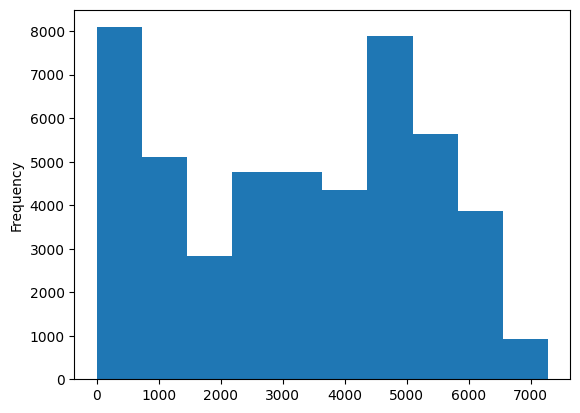

In [12]:
traffic_data['traffic_volume'].plot.hist()
plt.show()

In [13]:
traffic_data['date_time'].describe()

,date_time
count,48204
unique,40575
top,2013-04-18 22:00:00
freq,6


In [14]:
#divide your dataset into two parts"night and day"
traffic_data['date_time'] = pd.to_datetime(traffic_data['date_time'])

traffic_day = traffic_data.copy()[(traffic_data['date_time'].dt.hour >= 7) & (traffic_data['date_time'].dt.hour < 19)]
traffic_night = traffic_data.copy()[(traffic_data['date_time'].dt.hour >= 19) | (traffic_data['date_time'].dt.hour < 7)]
print(traffic_night.shape, traffic_day.shape)

(24327, 9) (23877, 9)


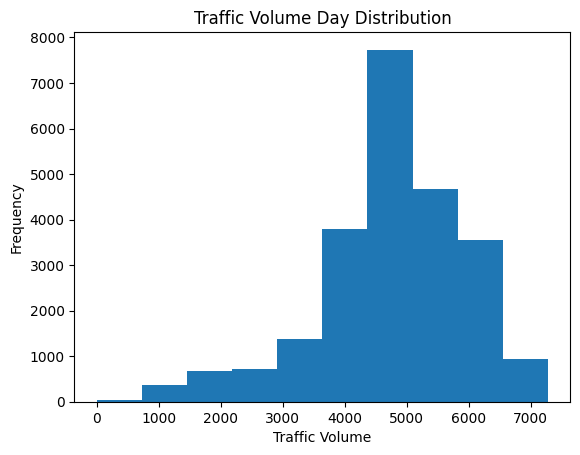

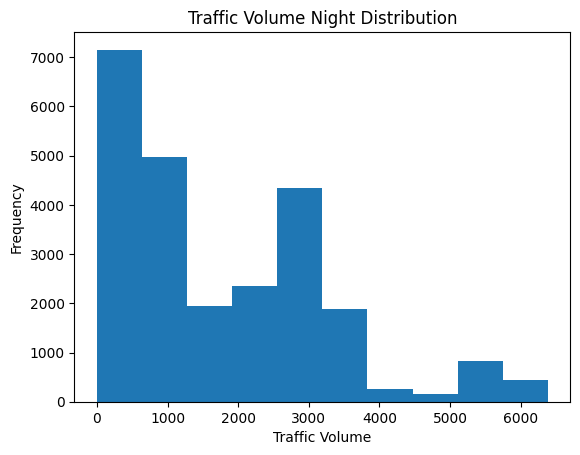

In [17]:
traffic_day['traffic_volume'].plot.hist()
plt.title('Traffic Volume Day Distribution')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.show()

traffic_night['traffic_volume'].plot.hist()
plt.title('Traffic Volume Night Distribution')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.show()

Based off the skewness of the graphs above, ypu cam see that at night the frequency of traffice is relatively more light as compared to day time

Another indicators of traffic based of time is looking at other factors like the month of the year or day of the week

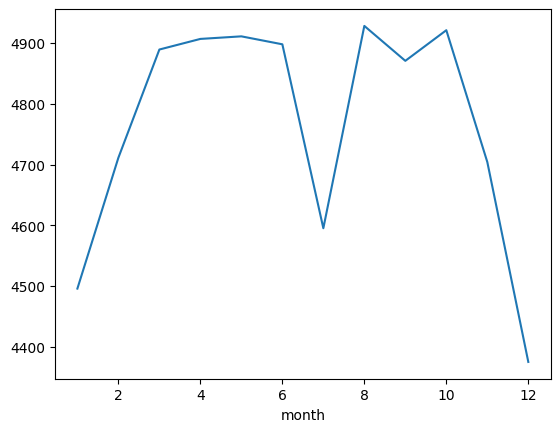

In [20]:
traffic_day['month'] = traffic_day['date_time'].dt.month
traffic_month = traffic_day.groupby('month')['traffic_volume'].mean()
traffic_month.plot.line()
plt.show()

Based off the graph, it shows that the traffic is lighter in the colder monnths but heavier is hot months, with the exception of july. Lets further explore why that is

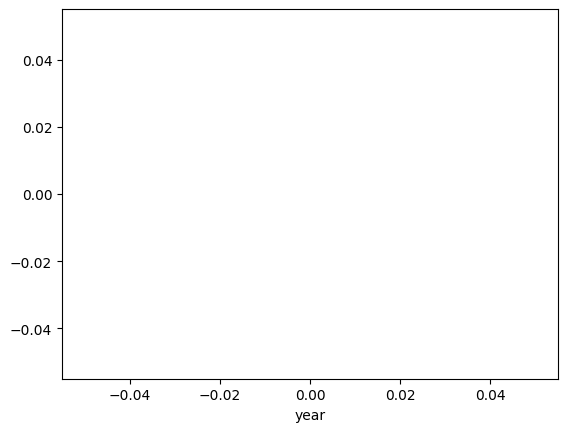

In [55]:
traffic_day['year'] = traffic_data['date_time'].dt.year
traffic_july = traffic_day[traffic_day['month'] == 2021]
traffic_july.groupby('year').mean()['traffic_volume'].plot.line()
plt.show()

Another factor that could affect traffic is the weather. Lets see what the correlation is with weather and traffic volume

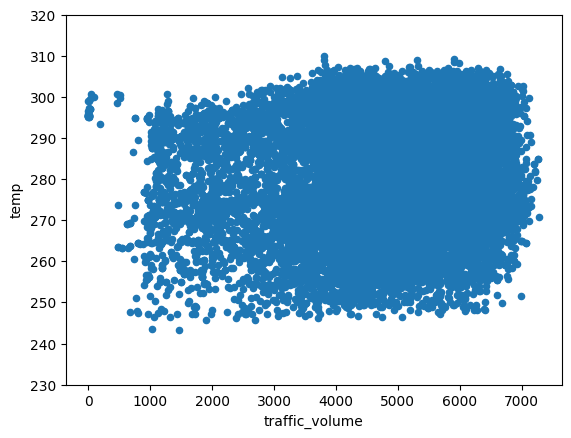

In [31]:
traffic_day.plot.scatter('traffic_volume','temp')
plt.ylim(230,320)
plt.show()
#doesnt look like there are any correlarion strictly between the temperature and traffic volume

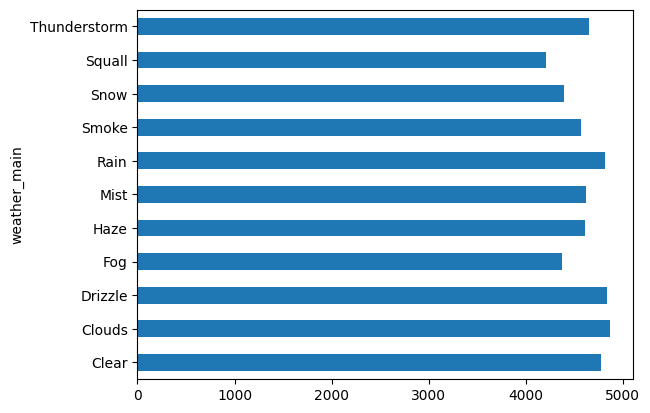

In [36]:
traffic_weather_main = traffic_day.groupby('weather_main')['traffic_volume'].mean()
traffic_weather_main.plot.barh()
plt.show()

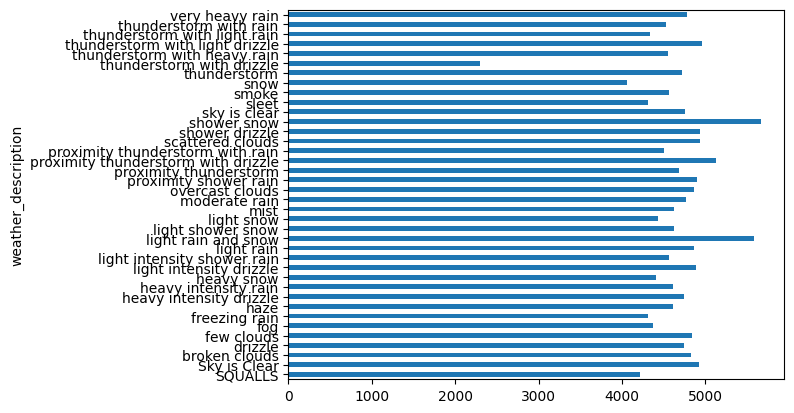

In [37]:
traffic_weather_main = traffic_day.groupby('weather_description')['traffic_volume'].mean()
traffic_weather_main.plot.barh()
plt.show()

THe top two weather description that shows the highest traffic volums are  - light rain and snow
- shower snow